<a href="https://colab.research.google.com/github/jerrymart/Machine-Learning-Projects/blob/main/Logistic_Regression_Loan_Prediction(Complete).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 3. Problem Formulation

- In this example, we want to investigate "what factors/variables affect a good or a bad loan"
- Make predictions whether a customer should get its loan approved or not based on their characteristics
- Hence our Dependent variable (y) is the Loan Approval (Yes/No) or if the Loan is Good or Bad

### Importing / Installing packages

In [ ]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
#sns.set(rc={'figure.figsize':(12,10)})


import warnings
warnings.filterwarnings('ignore')


### 4. Loading the Raw Data

In [ ]:
# Loading the data
raw_data = pd.read_csv('LogisticRegressionDummyData.csv')

# print the shape
print(raw_data.shape)

#runs the first 5 rows
raw_data.head(5)

(1006, 14)


,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
0,No Data,critical,Learning / Edu purposes,2116.0,0-200,5-7 Years,Male,No,Property - Real Estate,47.0,House Owner,Services,No,No
1,No Data,critical,TV,2438.0,No Data,7+ Years,Male,No,Savings Account,52.0,House Owner,Skilled Labor,No,No
2,No Data,critical,Buying a New Car,2144.0,0-200,2-5 Years,Male,No,Vehicle,48.0,House Owner,Skilled Labor,No,No
3,No Data,critical,Home furniture,2073.0,No Data,2-5 Years,Married,No,Vehicle,25.0,House Owner,Skilled Labor,Yes,No
4,No Data,critical,Support for Business,1276.0,No Data,7+ Years,Male,No,No Security,59.0,Renting,Services,No,No


## 5. Data Preprocessing

### 5.1. Exploratory Data Analysis

In [ ]:
# Checking for null values

raw_data.isnull().sum()

Type of Account          2
Account History          2
Reason for the Loan      3
Loan Amount              3
Account Savings          4
Employment History       5
Individual Stauts        5
Other Loans              5
Security / Collateral    5
Age                      4
Residence Status         4
Job                      4
Completed Other loan?    4
Good Loan                5
dtype: int64

In [ ]:
# Visualize the NULL observations

raw_data[raw_data['Employment History'].isnull()]

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
686,Type C,Good,Buying a New Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
721,Type C,critical,Home furniture,5387.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737,Type C,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,House Owner,Services,No,NaN
1005,NaN,NaN,NaN,1765.0,0-201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Deleting the NULL values
raw_data = raw_data.dropna(subset = ['Employment History'])

# Printing the shape
print(raw_data.shape)

# Visualize the NULL observations
raw_data.isnull().sum()

(1001, 14)


Type of Account          0
Account History          0
Reason for the Loan      0
Loan Amount              0
Account Savings          0
Employment History       0
Individual Stauts        0
Other Loans              0
Security / Collateral    0
Age                      0
Residence Status         0
Job                      0
Completed Other loan?    0
Good Loan                0
dtype: int64

In [ ]:
raw_data.nunique()

Type of Account            4
Account History            3
Reason for the Loan       10
Loan Amount              910
Account Savings            5
Employment History         5
Individual Stauts          4
Other Loans                2
Security / Collateral      4
Age                       56
Residence Status           3
Job                        4
Completed Other loan?      2
Good Loan                  2
dtype: int64

In [ ]:
# Investigate all the elements whithin each Feature 

for column in raw_data:
    unique_values = np.unique(raw_data[column])
    nr_values = len(unique_values)
    if nr_values <= 10:
        print("The number of values for feature {} is: {} -- {}".format(column, nr_values, unique_values))
    else:
        print("The number of values for feature {} is: {}".format(column, nr_values))

The number of values for feature Type of Account is: 4 -- ['No Data' 'Type A' 'Type B' 'Type C']
The number of values for feature Account History is: 3 -- ['Average (known delays)' 'Good' 'critical']
The number of values for feature Reason for the Loan is: 10 -- ['Advance Edu/training' 'All other' 'Buying a New Car' 'Buying a Used Car'
 'Home Devices' 'Home furniture' 'Learning / Edu purposes' 'Renovation'
 'Support for Business' 'TV']
The number of values for feature Loan Amount is: 911
The number of values for feature Account Savings is: 5 -- ['0-200' '1000+' '200-500' '500-1000' 'No Data']
The number of values for feature Employment History is: 5 -- ['0-2 Years' '2-5 Years' '5-7 Years' '7+ Years' 'Unemployed']
The number of values for feature Individual Stauts is: 5 -- ['Divorced' 'Female' 'Female_' 'Male' 'Married']
The number of values for feature Other Loans is: 2 -- ['No' 'Yes']
The number of values for feature Security / Collateral is: 4 -- ['No Security' 'Property - Real Estat

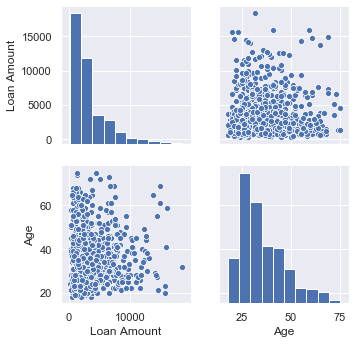

In [ ]:
# Visualize the data using seaborn Pairplots

g = sns.pairplot(raw_data)

# Notes: Do not run this on a big dataset. Filter the columns first

In [ ]:
sns.pairplot(raw_data,vars=[['Loan Amount','Age']])

In [ ]:
outlier_Age = raw_data[raw_data['Age'] > 100]
outlier_Age

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
679,Type C,Good,Home furniture,-548541254.0,No Data,Unemployed,Female_,No,Vehicle,327.0,House Owner,Skilled Labor,Yes,Yes


### 5.2. Data Cleaning

In [ ]:
# Deleting the outlier

raw_data = raw_data[raw_data['Age'] < 100]

raw_data.shape

(1000, 14)

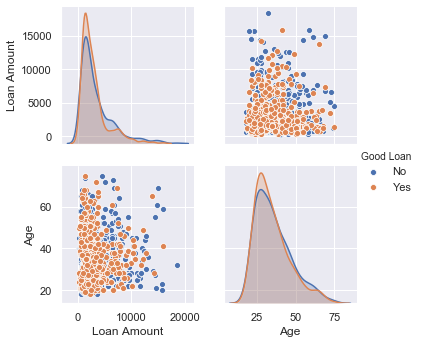

In [ ]:
# Visualize the data using seaborn Pairplots

g = sns.pairplot(raw_data, hue = 'Good Loan')


### Check for balanceness of the target

If there is implance in the data, we would need to balance it

<AxesSubplot:xlabel='Good Loan', ylabel='count'>

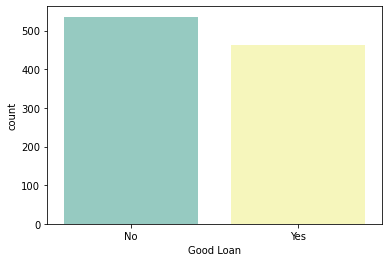

In [ ]:
# Investigating the distr of y 

sns.countplot(x = 'Good Loan', data = raw_data, palette = 'Set3')

In [ ]:
raw_data.columns

Index(['Type of Account', 'Account History', 'Reason for the Loan',
       'Loan Amount', 'Account Savings', 'Employment History',
       'Individual Stauts', 'Other Loans', 'Security / Collateral', 'Age',
       'Residence Status', 'Job', 'Completed Other loan?', 'Good Loan'],
      dtype='object')

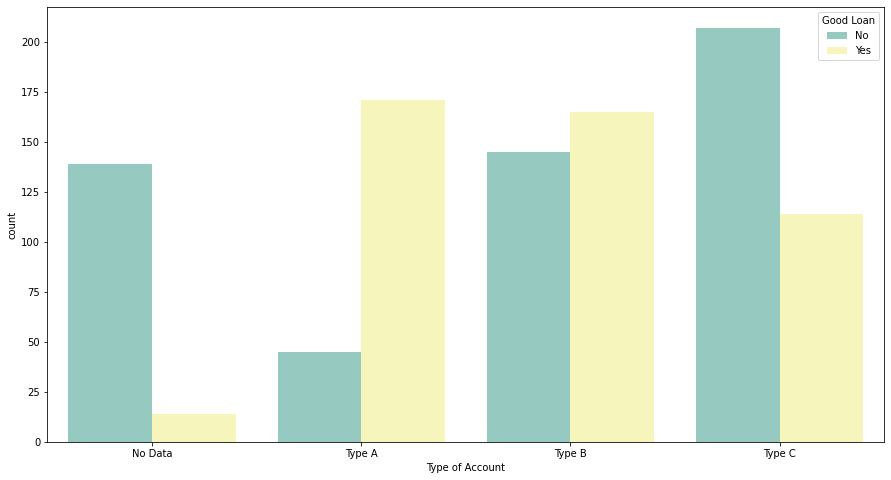

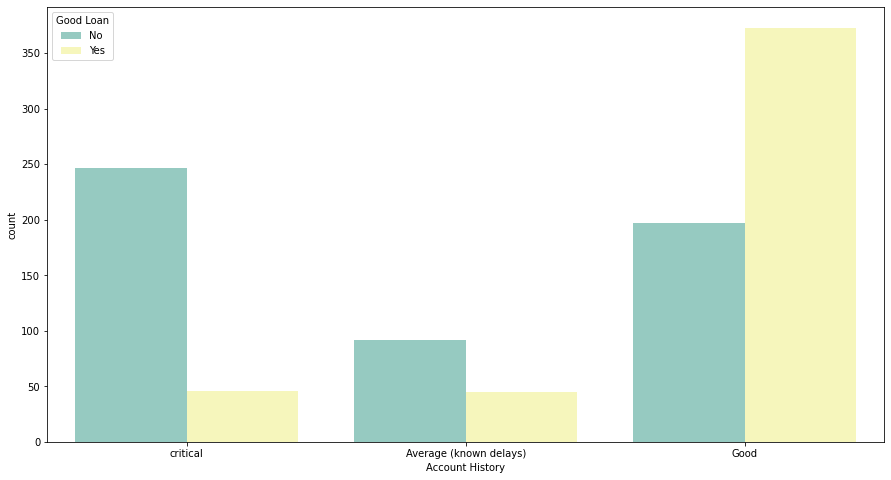

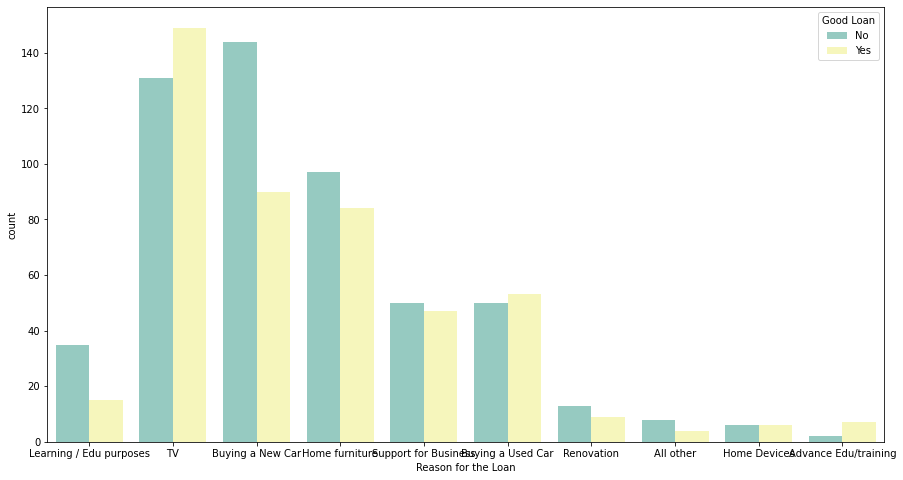

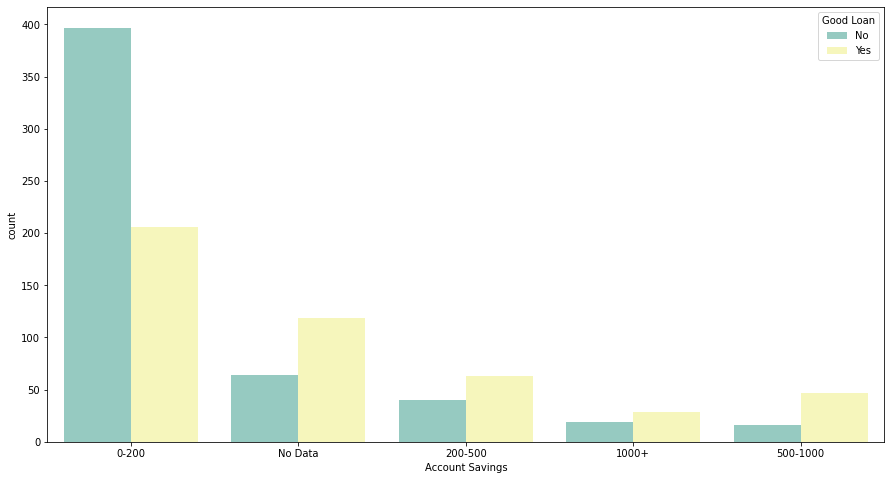

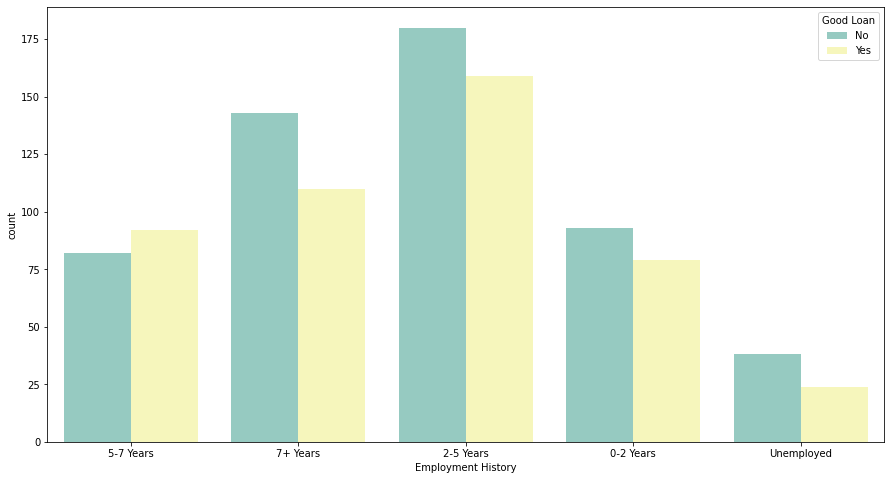

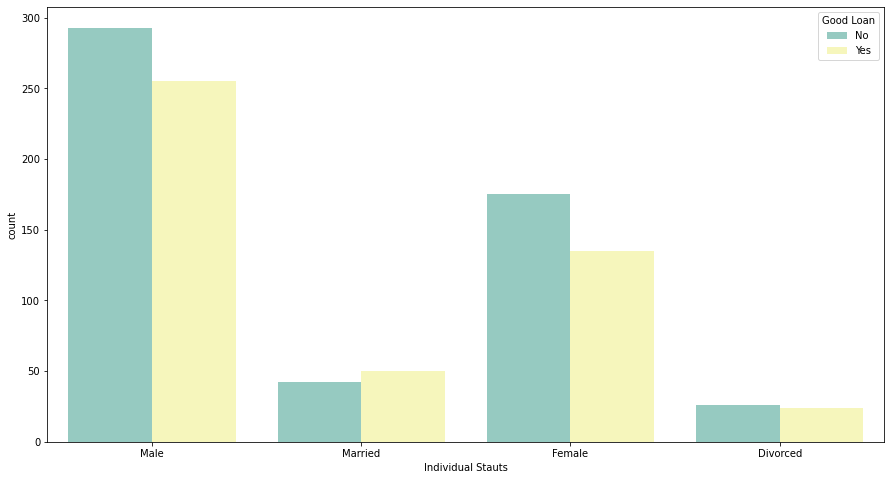

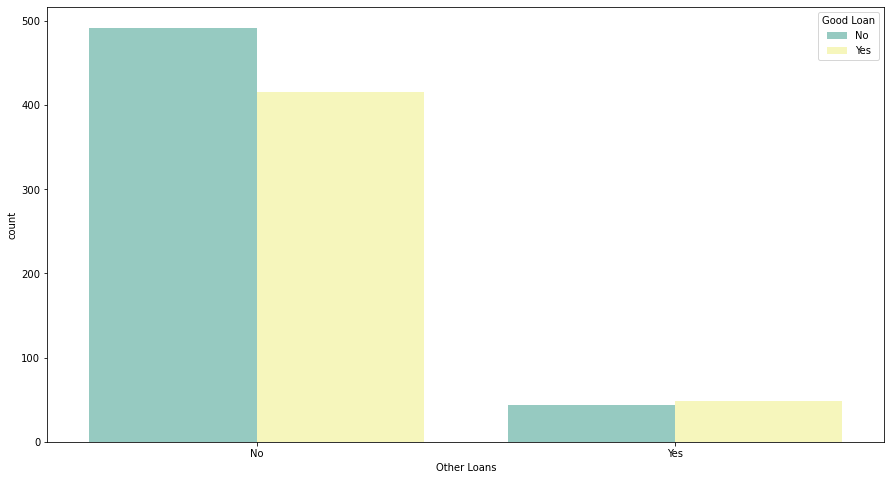

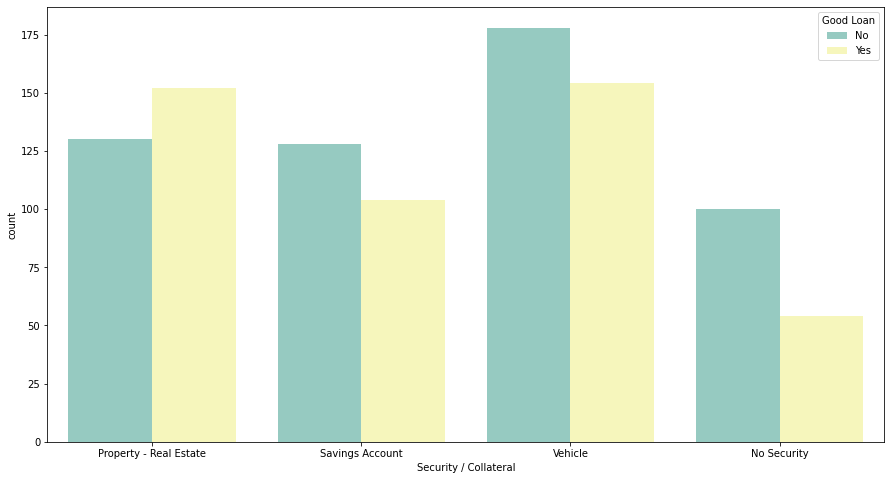

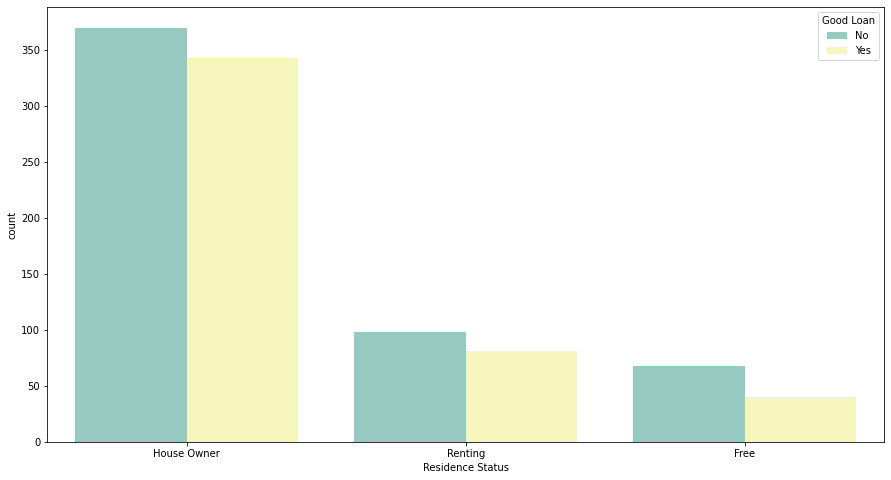

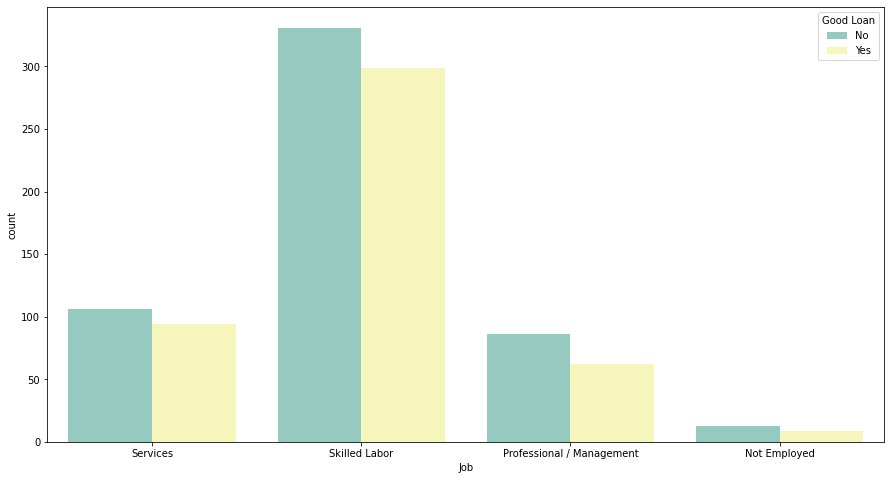

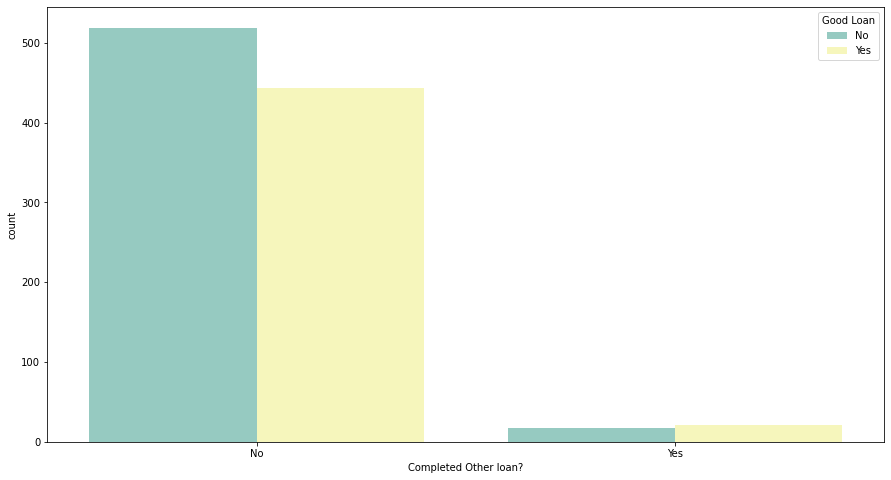

In [ ]:
# Looping through all the categorical features by our y variable - see if there is relationship

features = ['Type of Account', 'Account History', 'Reason for the Loan',
       'Account Savings', 'Employment History',
       'Individual Stauts', 'Other Loans', 'Security / Collateral',
       'Residence Status', 'Job', 'Completed Other loan?']

for f in features:
    plt.figure(figsize=(15,8))
    sns.countplot(x = f, data = raw_data, palette = 'Set3', hue = 'Good Loan')
    plt.show()
    
    

In [ ]:
raw_data.head()

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
0,No Data,critical,Learning / Edu purposes,2116.0,0-200,5-7 Years,Male,No,Property - Real Estate,47.0,House Owner,Services,No,No
1,No Data,critical,TV,2438.0,No Data,7+ Years,Male,No,Savings Account,52.0,House Owner,Skilled Labor,No,No
2,No Data,critical,Buying a New Car,2144.0,0-200,2-5 Years,Male,No,Vehicle,48.0,House Owner,Skilled Labor,No,No
3,No Data,critical,Home furniture,2073.0,No Data,2-5 Years,Married,No,Vehicle,25.0,House Owner,Skilled Labor,Yes,No
4,No Data,critical,Support for Business,1276.0,No Data,7+ Years,Male,No,No Security,59.0,Renting,Services,No,No


In [ ]:
# Making categorical variables into numeric representation
# We can also do this with Label Encoding and OneHotEncoder from the preprocessing library
new_raw_data = pd.get_dummies(raw_data, columns = features)


In [ ]:
#Watch out for dummy variable trap, this is done in my Linear Regression and DecisionTree/Rnadom Forest/XGBoost project

In [ ]:
print(raw_data.shape)
# print the shape
print(new_raw_data.shape)

(1000, 14)
(1000, 49)


In [ ]:
# Change Y-Variable into 0s and 1s

new_raw_data['Good Loan'][new_raw_data['Good Loan'] == 'Yes'] = 1
new_raw_data['Good Loan'][new_raw_data['Good Loan'] == 'No'] = 0

In [ ]:
# Visualizing the data
new_raw_data

,Loan Amount,Age,Good Loan,Type of Account_No Data,Type of Account_Type A,Type of Account_Type B,Type of Account_Type C,Account History_Average (known delays),Account History_Good,Account History_critical,...,Security / Collateral_Vehicle,Residence Status_Free,Residence Status_House Owner,Residence Status_Renting,Job_Not Employed,Job_Professional / Management,Job_Services,Job_Skilled Labor,Completed Other loan?_No,Completed Other loan?_Yes
0,2116.0,47.0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
1,2438.0,52.0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
2,2144.0,48.0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,1,0
3,2073.0,25.0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,1
4,1276.0,59.0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,3602.0,47.0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0
1000,4473.0,35.0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,1,0
1001,12759.0,38.0,1,0,0,0,1,1,0,0,...,1,0,1,0,0,1,0,0,1,0
1002,2551.0,47.0,0,0,0,0,1,1,0,0,...,1,0,1,0,0,0,1,0,1,0


In [ ]:
#for row in new_raw_data['Good Loan']:
    #if new_raw_data['Good Loan'] == 'Yes':  new_raw_data['Good Loan']=1
   
    #else:  new_raw_data['Good Loan'] = 0            

#### Notes:

###### We do not need to normalize / standardize the data in Logistic Regression due to the logistic function (0 or 1)
###### Once a value crosses the decision boundary (0.5 threshold), it saturates
###### After the 0.5 or before, there is no additional value to be added from smaller or larger values
###### more details: https://medium.com/@swethalakshmanan14/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff

## Feature Selection
In this example, we do not have many variables so we might use all of the data but in some cases, you have thousands of variables and you will need to filter them in order to save computational time

#### Steps of Running Feature Importance
- Split the data into X & y
- Run a Tree-based estimators (i.e. decision trees & random forests) 
- Run Feature Importance

In [ ]:
# Split the data into X & y

X = new_raw_data.drop('Good Loan', axis = 1).values  # make X a vector
y = new_raw_data['Good Loan']

y = y.astype(int)

print(X.shape)
print(y.shape)

(1000, 48)
(1000,)


In [ ]:
# Run a Tree-based estimators (i.e. decision trees & random forests)

dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(X,y)

# If you want to learn how Decesion Trees work, read here: https://www.datacamp.com/community/tutorials/decision-tree-classification-python
# Official Doc: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

#### Notes:
- The optimal way to do this is using RandomizedSearchCV to get best estimators, this is done n RandomFrest/XGBoost project

- The importance of a feature is calculated as the (normalized) total reduction of entropy (other criterions too) brought by that feature or the higher information gain
- To understand the maths, read this: https://towardsdatascience.com/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3

In [ ]:
# Running Feature Importance

fi_col = []
fi = []

for i,column in enumerate(new_raw_data.drop('Good Loan', axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

The feature importance for Loan Amount is : 0.12122079844891431
The feature importance for Age is : 0.07962988068108864
The feature importance for Type of Account_No Data is : 0.054236275712355064
The feature importance for Type of Account_Type A is : 0.04973253970745607
The feature importance for Type of Account_Type B is : 0.0
The feature importance for Type of Account_Type C is : 0.026698167265803152
The feature importance for Account History_Average (known delays) is : 0.0026219295620499047
The feature importance for Account History_Good is : 0.19131616315491018
The feature importance for Account History_critical is : 0.0
The feature importance for Reason for the Loan_Advance Edu/training is : 0.0
The feature importance for Reason for the Loan_All other is : 0.0
The feature importance for Reason for the Loan_Buying a New Car is : 0.012188194319512301
The feature importance for Reason for the Loan_Buying a Used Car is : 0.00657340597791024
The feature importance for Reason for the L

In [ ]:
# Creating a Dataframe
fi_col
fi

fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])
fi_df


# Ordering the data
fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()

fi_df

,index,Feature,Feature Importance
0,19,Account Savings_0-200,0.197515
1,7,Account History_Good,0.191316
2,0,Loan Amount,0.121221
3,1,Age,0.079630
4,2,Type of Account_No Data,0.054236
5,3,Type of Account_Type A,0.049733
6,5,Type of Account_Type C,0.026698
7,45,Job_Skilled Labor,0.020597
8,34,Other Loans_Yes,0.017520
9,23,Account Savings_No Data,0.016471


In [ ]:
print(new_raw_data.shape)

(1000, 49)


### Important Colums  to keep

In [ ]:
columns_to_keep = fi_df['Feature'][0:40]

columns_to_keep

0                            Account Savings_0-200
1                             Account History_Good
2                                      Loan Amount
3                                              Age
4                          Type of Account_No Data
5                           Type of Account_Type A
6                           Type of Account_Type C
7                                Job_Skilled Labor
8                                  Other Loans_Yes
9                          Account Savings_No Data
10        Reason for the Loan_Support for Business
11                          Reason for the Loan_TV
12                           Account Savings_1000+
13    Security / Collateral_Property - Real Estate
14            Reason for the Loan_Buying a New Car
15                                    Job_Services
16                    Residence Status_House Owner
17                    Employment History_0-2 Years
18              Reason for the Loan_Home furniture
19                         Acco

# Alterntively

##  Splitting the Raw Data - Hold-out validation

In [ ]:
#new data goig forward
print(new_raw_data[columns_to_keep].shape)

# new_raw_data = new_raw_data[columns_to_keep]

(1000, 49)
(1000, 40)


In [ ]:
new_raw_data.head()

,Loan Amount,Age,Good Loan,Type of Account_No Data,Type of Account_Type A,Type of Account_Type B,Type of Account_Type C,Account History_Average (known delays),Account History_Good,Account History_critical,...,Security / Collateral_Vehicle,Residence Status_Free,Residence Status_House Owner,Residence Status_Renting,Job_Not Employed,Job_Professional / Management,Job_Services,Job_Skilled Labor,Completed Other loan?_No,Completed Other loan?_Yes
0,2116.0,47.0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
1,2438.0,52.0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
2,2144.0,48.0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,1,0
3,2073.0,25.0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,1
4,1276.0,59.0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0


In [ ]:
# Split the data into X & y

X = new_raw_data[columns_to_keep].values

y = new_raw_data['Good Loan']  
y = y.astype(int)     #convert y from object to int


print(X.shape)
print(y.shape)

(1000, 40)
(1000,)


In [ ]:
# Hold-out validation

# first one
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=15)

# Second one: It will be used after hyper-parameter tuning
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, test_size=0.1, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

# Official Doc: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

(720, 40)
(200, 40)
(80, 40)
(720,)
(200,)
(80,)


# Check for Balance in the in splitted Ys

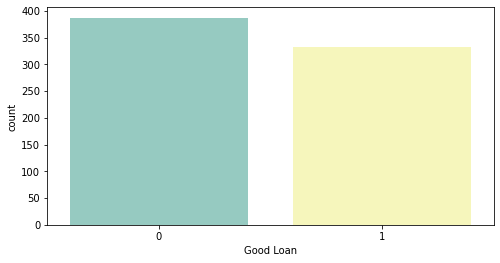

In [ ]:
# Investigating the distr y_train

plt.figure(figsize=(8,4))
ax = sns.countplot(x = y_train, palette = "Set3")

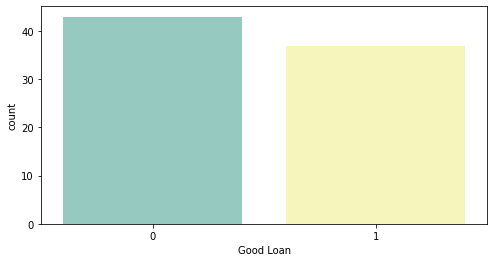

In [ ]:
# Investigating the distr of y_valid

plt.figure(figsize=(8,4))
ax = sns.countplot(x = y_valid, palette = "Set3")

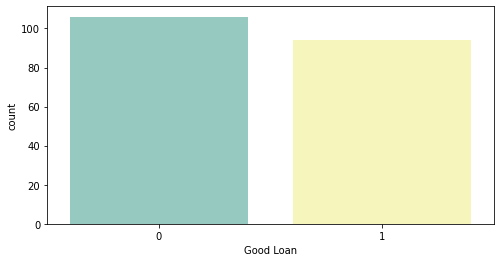

In [ ]:
# Investigating the distr of y_test

plt.figure(figsize=(8,4))
ax = sns.countplot(x = y_test, palette = "Set3")

## Running Logistic Regression

In [ ]:
# Training my model

log_reg = LogisticRegression(random_state=10, solver = 'lbfgs')

log_reg.fit(X_train, y_train)

# SKLearn doc: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

LogisticRegression(random_state=10)

In [ ]:
### Methods we can use in Logistic

# predict - Predict class labels for samples in X
y_pred = log_reg.predict(X_train)


# predict_proba - Probability estimates
pred_proba = log_reg.predict_proba(X_train)

# coef_ - Coefficient of the features in the decision function
log_reg.coef_

# score- Returns the mean accuracy on the given test data and labels - below

array([[-1.414415, 1.895515, -0.000124, 0.006603, -1.451759, 0.971756,
        -0.191489, -0.089067, 0.258480, 0.529939, 0.161084, 0.050142,
        0.239664, 0.442354, -0.690158, -0.117224, 0.041737, -0.451682,
        0.313925, 0.169194, -0.379968, 0.034117, -0.170529, 0.508263,
        -0.135459, 0.013961, 0.392004, 0.047327, -0.036950, 0.365566,
        0.127444, -0.242493, 0.132442, -0.278851, 0.101799, -0.066592,
        -0.001908, -0.259929, 0.112389, -0.114838]])

In [ ]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,

In [ ]:
pred_proba

array([[0.633663, 0.366337],
       [0.861788, 0.138212],
       [0.292643, 0.707357],
       ...,
       [0.840408, 0.159592],
       [0.923924, 0.076076],
       [0.092620, 0.907380]])

## 9. Evaluating the Model

In [ ]:
# Accuracy on Train
print("The Training Accuracy is: ", log_reg.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", log_reg.score(X_test, y_test))

print(end="\n\n\n\n")


# Classification Report
print(classification_report(y_train, y_pred))

The Training Accuracy is:  0.7791666666666667
The Testing Accuracy is:  0.75




              precision    recall  f1-score   support

           0       0.80      0.81      0.80       387
           1       0.77      0.77      0.77       333

    accuracy                           0.79       720
   macro avg       0.79      0.79      0.79       720
weighted avg       0.79      0.79      0.79       720



In [ ]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        plt.figure(figsize=(8,5))
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        plt.figure(figsize=(8,5))
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

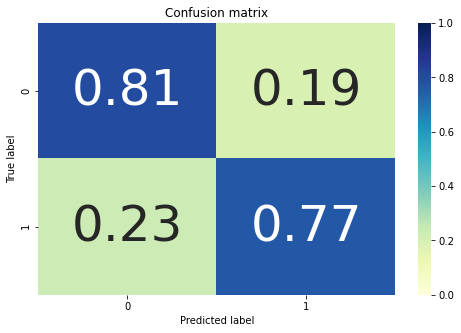

In [ ]:
#Create Confusion Matrix
cm = confusion_matrix(y_train, y_pred)

#percentage calculation
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)


# Visualizing cm
plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

In [ ]:
log_reg.classes_

array([0, 1])

In [ ]:
cm.sum(axis=1)
cm_norm

array([[0.803618, 0.196382],
       [0.249249, 0.750751]])

In [ ]:
cm

array([[311,  76],
       [ 83, 250]], dtype=int64)

In [ ]:
cm.sum(axis=0)

array([394, 326], dtype=int64)

In [ ]:
np.diag(cm)

array([311, 250], dtype=int64)

# Further Model Evaluation

### How Good Is The Model 

In [ ]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)



##Total averages :
print("")
print("The average TPR is:", TPR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)


The True Positive Rate is: [0.803618 0.750751]
The Precision is: [0.789340 0.766871]
The False positive rate is: [0.249249 0.196382]
The False Negative Rate is:  [0.196382 0.249249]

The average TPR is: 0.7771841609050911
The average Precision is: 0.7781056335835073
The average False positive rate is: 0.22281583909490887
The average False Negative Rate is: 0.22281583909490887


# Further Model Evaluation With Log Loss

### Logarithmic loss - or Log Loss - or cross-entropy loss

- Log Loss is an error metric
- This is the loss function used in (multinomial) logistic regression, defined as the negative log-likelihood of the true labels given a probabilistic classifier’s predictions. 

- Why it's important? For example, imagine having 2 models / classifiers that both predict one observation correctly (Good Loan). However, 1 classifier has a predicted probability of 0.54 and the other 0.95. Which one will you choose? Classification Accuracy will not help here as it will get both on 100%

- Doc: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html

### This Log-loss should be used on all algorthms before choosing the best. The lower the log loss, the better the model we either use this process or we can spot check algorithms with scoring='accuracy').mean()

In [ ]:
# Running Log loss on training
from sklearn.metrics import log_loss

print("The Log Loss on Training is: ", log_loss(y_train, pred_proba))

# Running Log loss on testing
pred_proba_t = log_reg.predict_proba(X_test)
print("The Log Loss on Testing Dataset is: ", log_loss(y_test, pred_proba_t))

The Log Loss on Training is:  0.45612184724770294
The Log Loss on Testing Dataset is:  0.4935875358730101


## Hyper Parameter Tuning

- We will loop over parameter C (Inverse of regularization strength).
- Inverse of regularization strength helps to avoid overfitting - it penalizes large values of your parameters
- It also helps to find Global Minimum by moving to better "solutions" from local minimum to global minimum
- The values of C to search should be n-equally-spaced values in log space ranging from 1e-5 to 1e5

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
np.geomspace(1e-5, 1e5, num=20)

array([0.000010, 0.000034, 0.000113, 0.000379, 0.001274, 0.004281,
       0.014384, 0.048329, 0.162378, 0.545559, 1.832981, 6.158482,
       20.691381, 69.519280, 233.572147, 784.759970, 2636.650899,
       8858.667904, 29763.514416, 100000.000000])

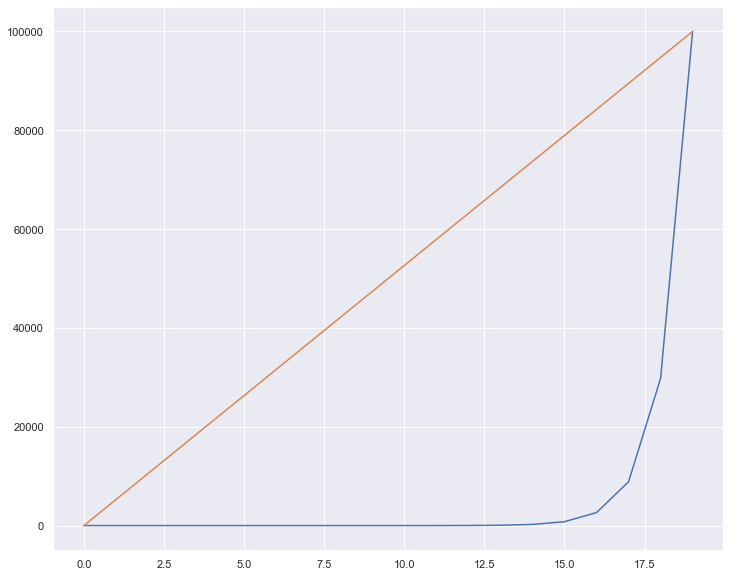

In [ ]:
# Creating a range for C values
np.geomspace(1e-5, 1e5, num=20)

# ploting it
plt.plot(np.geomspace(1e-5, 1e5, num=20)) #  uniformly distributed in log space
plt.plot(np.linspace(1e-5, 1e5, num=20)) # uniformly distributed in linear space, instead of log space
# plt.plot(np.logspace(np.log10(1e-5) , np.log10(1e5) , num=20)) # same as geomspace


# Obtaining Best C-Parameter with SkLearn

In [ ]:
# Scikit-learn offers a LogisticRegressionCV module which implements Logistic Regression 
# with builtin cross-validation to find out the optimal C parameter

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)

C_List = np.geomspace(1e-5, 1e5, num=20)

# Logistic Reg CV
Log_reg3 = LogisticRegressionCV(random_state=15, Cs = C_List, solver ='lbfgs')
Log_reg3.fit(X_train, y_train)
print("The CA is:", Log_reg3.score(X_test, y_test))

#Log Loss and C Parameter
pred_proba_t = Log_reg3.predict_proba(X_test)
log_loss3 = log_loss(y_test, pred_proba_t)
print("The Logistic Loss is: ", log_loss3)
print("The optimal C parameter is: ", Log_reg3.C_)

# Doc: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html

The CA is: 0.755
The Logistic Loss is:  0.49376902264987194
The optimal C parameter is:  [0.545559]


# Alternatively: Obtaining C-Parameter Manually

In [ ]:
# Looping over the c parameters above

C_List = np.geomspace(1e-5, 1e5, num=20)
CA = []
Logarithmic_Loss = []

for c in C_List:
    log_reg2 = LogisticRegression(random_state=10, solver = 'lbfgs', C=c)
    log_reg2.fit(X_train, y_train)
    score = log_reg2.score(X_test, y_test)
    CA.append(score)
    print("The CA of C parameter {} is {}:".format(c, score))
    
    
    
    # Calculate log loss and C parameter
    pred_proba_t = log_reg2.predict_proba(X_test)
    
    log_loss2 = log_loss(y_test, pred_proba_t)
    Logarithmic_Loss.append(log_loss2)
    print("The Logg Loss of C parameter {} is {}:".format(c, log_loss2))


The CA of C parameter 1e-05 is 0.535:
The Logg Loss of C parameter 1e-05 is 0.6962402407700986:
The CA of C parameter 3.359818286283781e-05 is 0.54:
The Logg Loss of C parameter 3.359818286283781e-05 is 0.6942639549968314:
The CA of C parameter 0.00011288378916846884 is 0.54:
The Logg Loss of C parameter 0.00011288378916846884 is 0.692752630814025:
The CA of C parameter 0.000379269019073225 is 0.545:
The Logg Loss of C parameter 0.000379269019073225 is 0.6875079443809539:
The CA of C parameter 0.0012742749857031334 is 0.64:
The Logg Loss of C parameter 0.0012742749857031334 is 0.67147661392058:
The CA of C parameter 0.004281332398719391 is 0.67:
The Logg Loss of C parameter 0.004281332398719391 is 0.6329923109600215:
The CA of C parameter 0.01438449888287663 is 0.725:
The Logg Loss of C parameter 0.01438449888287663 is 0.5733419963635598:
The CA of C parameter 0.04832930238571752 is 0.705:
The Logg Loss of C parameter 0.04832930238571752 is 0.5223217551001738:
The CA of C parameter 0.1

In [ ]:
# putting the outcomes in a Table

# reshaping
CA2 = np.array(CA).reshape(20,)
Logarithmic_Loss2 = np.array(Logarithmic_Loss).reshape(20,)

# zip
outcomes = zip(C_List, CA2, Logarithmic_Loss2)

#df
df_outcomes = pd.DataFrame(outcomes, columns = ["C_List", 'CA2','Logarithmic_Loss2'])

#print
df_outcomes

# Ordering the data (sort_values)
df_outcomes.sort_values("Logarithmic_Loss2", ascending = True).reset_index()

,index,C_List,CA2,Logarithmic_Loss2
0,15,784.759970,0.775,0.487438
1,19,100000.000000,0.760,0.491842
2,13,69.519280,0.765,0.492557
3,12,20.691381,0.770,0.493078
4,16,2636.650899,0.770,0.493192
5,18,29763.514416,0.770,0.493202
6,17,8858.667904,0.770,0.493227
7,9,0.545559,0.745,0.493521
8,10,1.832981,0.750,0.493551
9,11,6.158482,0.760,0.494090


### Tracking Other Metrics other than Log Loss and Classification Accuracy

###### This will help us select the best 

The CA of C parameter 1e-05 is 0.535:
The Logg Loss of C parameter 1e-05 is 0.6962402407700986:



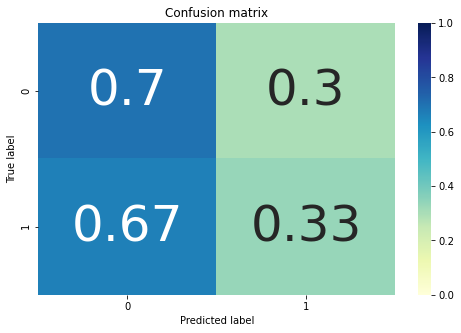

The CA of C parameter 3.359818286283781e-05 is 0.54:
The Logg Loss of C parameter 3.359818286283781e-05 is 0.6942639549968314:



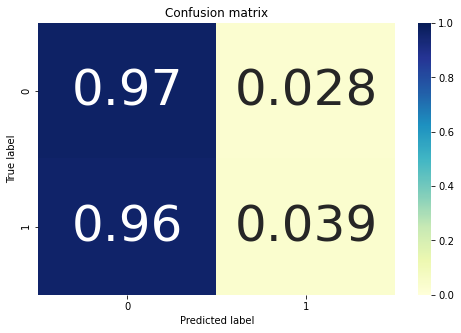

The CA of C parameter 0.00011288378916846884 is 0.54:
The Logg Loss of C parameter 0.00011288378916846884 is 0.692752630814025:



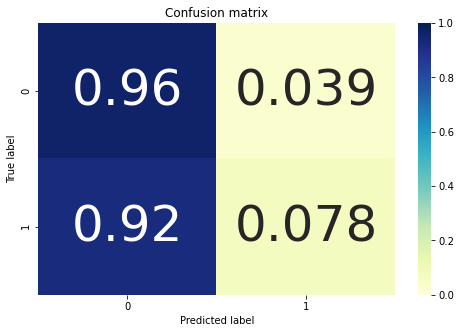

The CA of C parameter 0.000379269019073225 is 0.545:
The Logg Loss of C parameter 0.000379269019073225 is 0.6875079443809539:



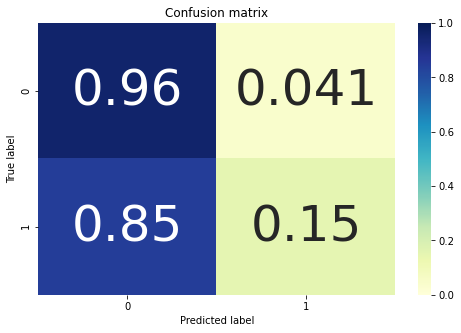

The CA of C parameter 0.0012742749857031334 is 0.64:
The Logg Loss of C parameter 0.0012742749857031334 is 0.67147661392058:



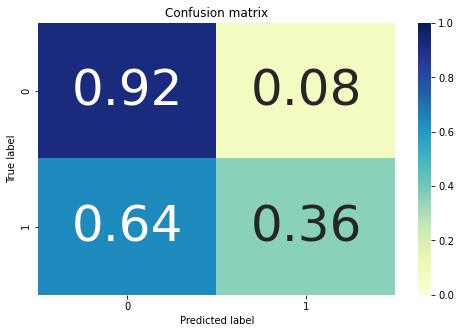

The CA of C parameter 0.004281332398719391 is 0.67:
The Logg Loss of C parameter 0.004281332398719391 is 0.6329923109600215:



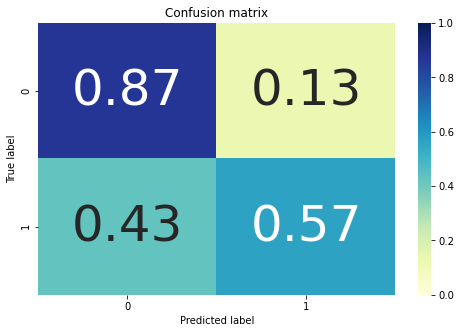

The CA of C parameter 0.01438449888287663 is 0.725:
The Logg Loss of C parameter 0.01438449888287663 is 0.5733419963635598:



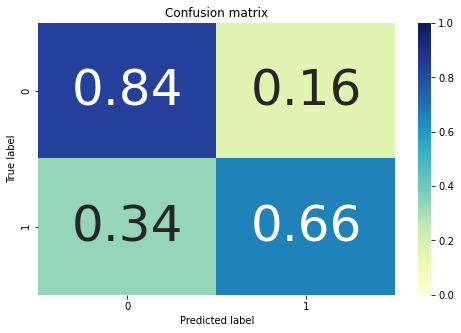

The CA of C parameter 0.04832930238571752 is 0.705:
The Logg Loss of C parameter 0.04832930238571752 is 0.5223217551001738:



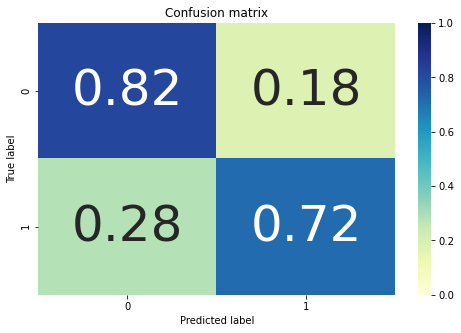

The CA of C parameter 0.1623776739188721 is 0.745:
The Logg Loss of C parameter 0.1623776739188721 is 0.49871561229295813:



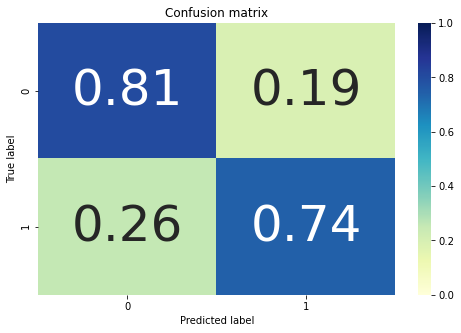

The CA of C parameter 0.5455594781168515 is 0.745:
The Logg Loss of C parameter 0.5455594781168515 is 0.4935207008889816:



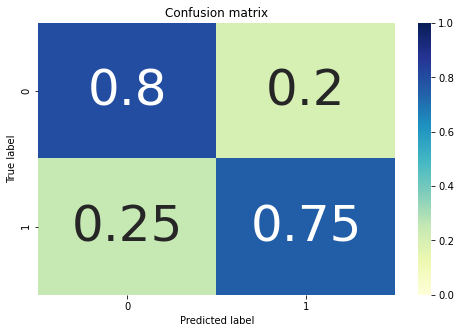

The CA of C parameter 1.8329807108324339 is 0.75:
The Logg Loss of C parameter 1.8329807108324339 is 0.49355090875560675:



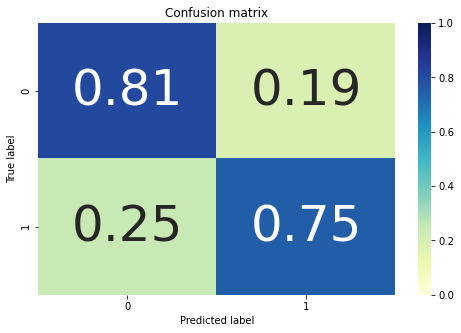

The CA of C parameter 6.1584821106602545 is 0.76:
The Logg Loss of C parameter 6.1584821106602545 is 0.4940900662940861:



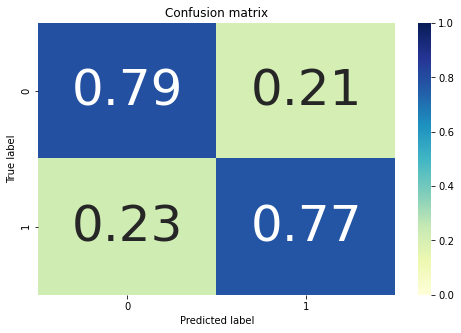

The CA of C parameter 20.6913808111479 is 0.77:
The Logg Loss of C parameter 20.6913808111479 is 0.4930782420104549:



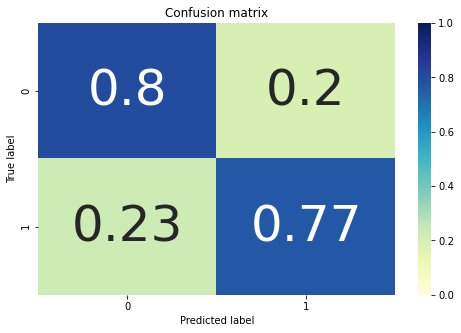

The CA of C parameter 69.51927961775606 is 0.765:
The Logg Loss of C parameter 69.51927961775606 is 0.4925566222558351:



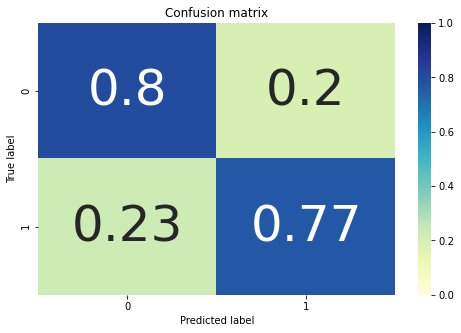

The CA of C parameter 233.57214690901213 is 0.755:
The Logg Loss of C parameter 233.57214690901213 is 0.4941455841738238:



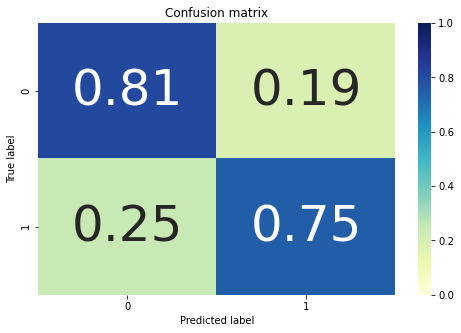

The CA of C parameter 784.7599703514607 is 0.775:
The Logg Loss of C parameter 784.7599703514607 is 0.48743815147909986:



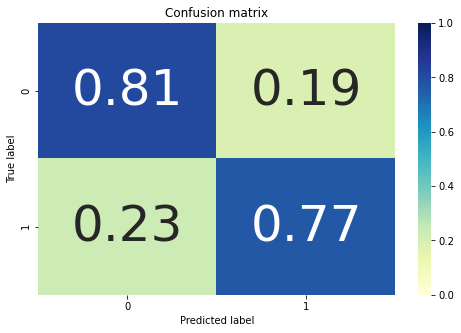

The CA of C parameter 2636.6508987303555 is 0.77:
The Logg Loss of C parameter 2636.6508987303555 is 0.49319243566102144:



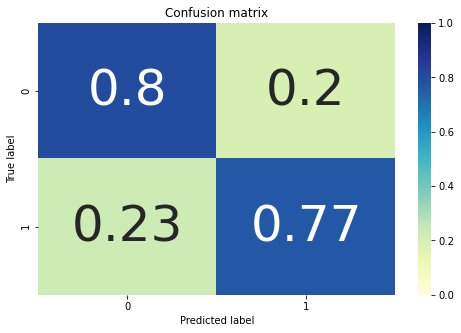

The CA of C parameter 8858.667904100832 is 0.77:
The Logg Loss of C parameter 8858.667904100832 is 0.49322690141129527:



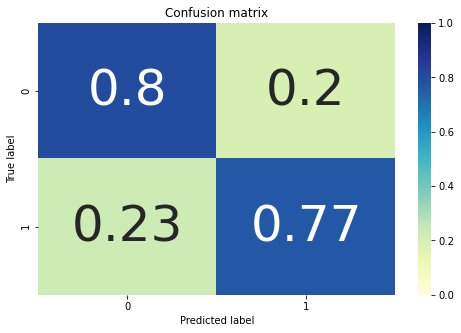

The CA of C parameter 29763.51441631313 is 0.77:
The Logg Loss of C parameter 29763.51441631313 is 0.49320187093518497:



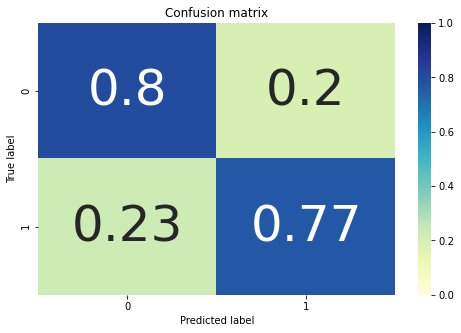

The CA of C parameter 100000.0 is 0.76:
The Logg Loss of C parameter 100000.0 is 0.4918417404853319:



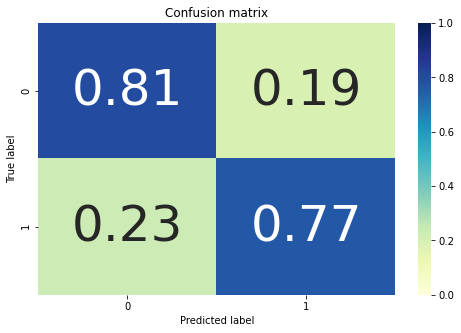

In [ ]:
# Confusion Matrix Track

# Looping over the parameters

C_List = np.geomspace(1e-5, 1e5, num=20)
CA = []
Logarithmic_Loss = []

for c in C_List:
    log_reg2 = LogisticRegression(random_state=10, solver = 'lbfgs', C=c)
    log_reg2.fit(X_train, y_train)
    score = log_reg2.score(X_test, y_test)
    CA.append(score)
    print("The CA of C parameter {} is {}:".format(c, score))
    pred_proba_t = log_reg2.predict_proba(X_test)
    log_loss2 = log_loss(y_test, pred_proba_t)
    Logarithmic_Loss.append(log_loss2)
    print("The Logg Loss of C parameter {} is {}:".format(c, log_loss2))
    print("")
    
    y_pred = log_reg2.predict(X_train)
    cm = confusion_matrix(y_train, y_pred)
    cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
    
    
    plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')
    plt.show()
  

# Training a Dummy Classifier

In [ ]:
# Training a Dummy Classifier

from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
score = dummy_clf.score(X_test, y_test)

pred_proba_t = dummy_clf.predict_proba(X_test)
log_loss2 = log_loss(y_test, pred_proba_t)

print("Testing Acc:", score)
print("Log Loss:", log_loss2)


# https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html

Testing Acc: 0.53
Log Loss: 16.233224905608022


## Final Model with Selected Parameters

###### We will build th final model on the validation data after hyper-parameter tuning [y_valid, x_valid]

In [ ]:
# Final Model Using Best C-Parameter from manually Tuning

log_reg3 = LogisticRegression(random_state=10, solver = 'lbfgs', C=784.759970)
log_reg3.fit(X_train, y_train)
score = log_reg3.score(X_valid, y_valid)

pred_proba_t = log_reg3.predict_proba(X_valid)
log_loss2 = log_loss(y_valid, pred_proba_t)

print("Testing Accuracy:", score)
print("Log Loss:", log_loss2)

Testing Accuracy: 0.7625
Log Loss: 0.4331831625017865


In [ ]:
# Final Model Using Best C-Parameter from LogisticRegressionCV Hyper-Parameter Tuning

log_reg3 = LogisticRegression(random_state=10, solver = 'lbfgs', C=0.545559)
log_reg3.fit(X_train, y_train)
score = log_reg3.score(X_valid, y_valid)

pred_proba_t = log_reg3.predict_proba(X_valid)
log_loss2 = log_loss(y_valid, pred_proba_t)

print("Testing Accuracy:", score)
print("Log Loss:", log_loss2)

Testing Accuracy: 0.7375
Log Loss: 0.448561567237266


## How to use our L. Regression model

#### 

- Option 1: Deploy the model in a CRM System or the Cloud or Viz tools and automaticaly decide if a customer should get his loan approved or not


- Option 2: Analyse the factors that affect a good/bad loan and help the business understand this. Then the business can educate their clients what they need to improve in order to get a loan


- Option 3: Deploy this model in an open bank website where customers can automatically see if their loan will get approved or not; saving time & cost for the bank/business
